In [3]:
import zipfile
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
from PIL import Image
import os
import numpy as np

def Load_data(path, target_size=(64, 64)):
   
    images = []
    labels = []
    
    for class_ in os.listdir(path):  
        class_path = os.path.join(path, class_)
        
        for img in os.listdir(class_path):  
            img_path = os.path.join(class_path, img)
            try:
                image = Image.open(img_path).convert("RGB")  
                image = image.resize(target_size)  
                image_array = np.array(image)  
                images.append(image_array)
                labels.append(int(class_[-1]))
            except Exception as e:
                print(f"Error processing image {img_path}: {e}")
    
    images_array = np.array(images) / 255.0  
    labels_array = np.array(labels)
    
    return images_array, labels_array


In [5]:
TRAIN_PATH = 'dataset/train/'
TEST_PATH = 'dataset/test/'
VALID_PATH = 'dataset/valid/'

In [6]:
train,ytrain = Load_data(TRAIN_PATH)
test,ytest = Load_data(TEST_PATH)
validation,y_valid=Load_data(VALID_PATH)

In [8]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
def CNN(xtrain,ytrain,xvalid,yvalid,epochs,batch_size):
    model = Sequential()
    model.add(Conv2D(64,(3,3),input_shape = (64,64,3),padding='same',activation='relu'))
    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D((2,2),padding='valid'))

    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D((2,2),padding='valid'))

    model.add(Flatten())

    model.add(Dense(512,activation='relu'))
    model.add(Dense(100,activation='relu'))
    
    model.add(Dense(3,activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(xtrain,ytrain,validation_data=(xvalid,yvalid),batch_size=batch_size,epochs=epochs)

    return history,model   

In [9]:
history_CNN,model = CNN(train,ytrain,validation,y_valid,50,200)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.3525 - loss: 1.4772 - val_accuracy: 0.3333 - val_loss: 1.0954
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.3993 - loss: 1.0680 - val_accuracy: 0.3333 - val_loss: 1.1317
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.4048 - loss: 1.0233 - val_accuracy: 0.3667 - val_loss: 1.0649
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.5525 - loss: 0.8787 - val_accuracy: 0.6167 - val_loss: 0.9230
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.6738 - loss: 0.6903 - val_accuracy: 0.6667 - val_loss: 0.6849
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.7879 - loss: 0.4870 - val_accuracy: 0.7000 - val_loss: 0.6249
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8421 - loss: 0.3810 - val_accuracy: 0.7000 - val_loss: 0.6402
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8304 - loss: 0.4382 - val_accuracy: 0.7167 - val_loss: 0.6130
Epoch 9/

In [10]:
def Plot_Accuracy(history,xlen):
    plt.plot(np.arange(1,xlen+1),history.history['accuracy'],c = 'b',label = 'Accuracy')
    plt.plot(np.arange(1,xlen+1),history.history['val_accuracy'],c = 'r',label = 'Val-Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracies')
    plt.legend()
    plt.show()

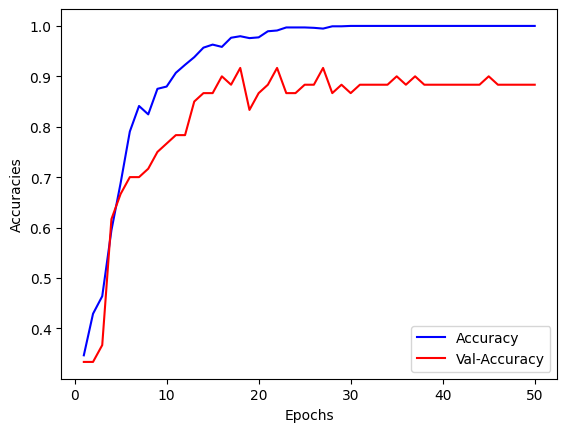

In [12]:
Plot_Accuracy(history_CNN,50)

In [13]:
pred = model.predict(test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step


In [14]:
pred_y_CNN = [np.where(pred[i] == max(pred[i]))[0][0] for i in range(pred.shape[0])]

In [15]:
def Model_Accuracy(ytest,pred_y):
    wrong_count = 0
    for i in range(len(ytest)): wrong_count += (ytest[i] != pred_y[i])

    acc1 = round((len(ytest) - wrong_count)/len(ytest) * 100,2)

    print(f"Accuracy  = {acc1}%")    

In [16]:
Model_Accuracy(pred_y_CNN,ytest)

Accuracy  = 89.33%


In [17]:
model.save('leaf_disease_model.h5')